In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [4]:
sess = tf.Session()
lin_reg = datasets.load_iris()
x_vals = np.array([x[3] for x in lin_reg.data])
y_vals = np.array([y[0] for y in lin_reg.data])
batch_size = 20

In [5]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data, A), b)

loss = tf.reduce_mean(tf.square(y_target - model_output))

my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(loss)

init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [6]:
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))
        

[slope] = sess.run(A)
[y_intercept] = sess.run(b)


best_fit = []
for i in x_vals:
      best_fit.append(slope*i+y_intercept)        

Step #25 A = [[ 2.230937]] b = [[ 2.81642127]]
Loss = 1.1591
Step #50 A = [[ 1.7231586]] b = [[ 3.63386869]]
Loss = 0.494233
Step #75 A = [[ 1.39158714]] b = [[ 4.07326937]]
Loss = 0.35377
Step #100 A = [[ 1.21546412]] b = [[ 4.32754707]]
Loss = 0.313074


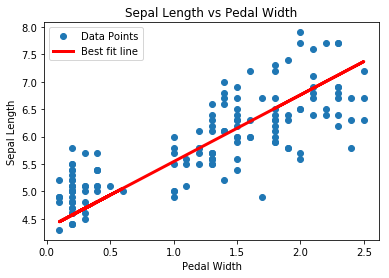

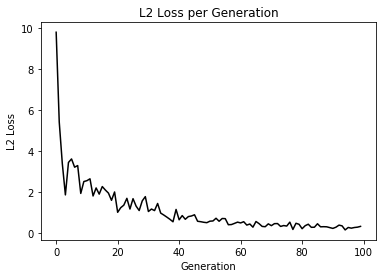

In [7]:
# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()
